# Exploratory Data Analysis using Python

### Most of the time spent in the modeling is to explore data which helps in improving the model's accuracy. The systematic approach to explore,analyze, prepare and clean our data is following
#######
1. Identifying the variable
2. Individual variable analysis and identification
3. Bi-Variate Analysis 
4. Treating missing values in data
5. Treatment of outliers
6. Feature Engineering(Variable Transformation and Creation)


## 1. Identifying variable 
########
Here I am using the loan processing data as my example . You can view sample of data as shown below. To do this we need the pandas library as we use the data frames for viewing the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

df = pd.read_csv("loan_processing_data.csv")

In [3]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,date
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,08-01-2000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,09-01-2000
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,10-01-2000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,11-01-2000
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,12-01-2000
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,13-01-2000
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,14-01-2000
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,15-01-2000
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,16-01-2000
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,17-01-2000


## 2. Identifying the Variable
Above you can see that we have loan_id, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, Co-applicant Income, Loan Amount, Loan Amount Term and Credit History which are much self describing.

#### These are columns of the data, this is considered as the variables. We will classify this variables in the Categorical and Continous Variables.
#### Gender, Married, Dependable, Education, Self - Employed are the Categorical variables.                                                                         where as Applicant Income, Co-applicant income, Loan Amount, Loan_Amount_Term and Credit History are continous variable.
### We cannot use the Loan ID as this will not summarize or generalize the data.

Below is the code which genaeralizes the data of continous variable 

In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df["Gender"].value_counts()


Male      489
Female    112
Name: Gender, dtype: int64

In [6]:
df["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

###### Last few code cells you could see how the data can be summarized for continous and categorical variables.                                                        
To summarize the continous variables the statistical measures are shown i.e., mean, standard deviation, IQR, range, min and max values.
To summarize the categorical varibles the frequency distribution is described. 

##### We can see the visualizations in graph format to describe single variable

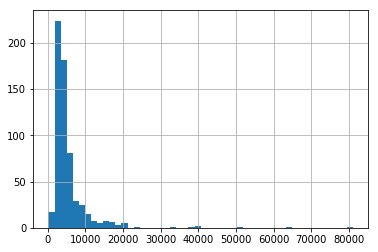

In [10]:
df['ApplicantIncome'].hist(bins=50)

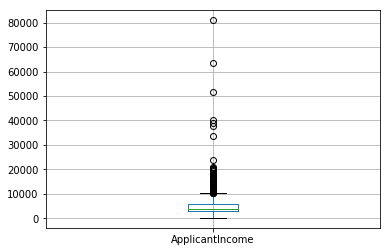

In [9]:
df.boxplot(column='ApplicantIncome')

In last two outputs you can see how the value of apllication income is distributed and which part of area is more concentrated through using box plot graph

## 3. Bivariate Analysis
#####  Here we will try to find the relationship between 2 variables. This can be performed on any combination of catehgorical & continous variables. Below are the possible combinations 
i. Continous & Continous 
ii. Continous & Categorical
iii. Categorical & Categorical

### i. Continous & Continous
Scatter plot are very useful in finding relationship. The relationship might be linear or non-linear. Scatter plot will be used to see kind of relationship but strength cannot be determined. To find the strength of relationship correlation is used. We will have positive correlation or negative correlation and 0 is for no relation.

Correlation = Covariance(X,Y)/Sqrt(Variance(X) * Variance(Y))
    

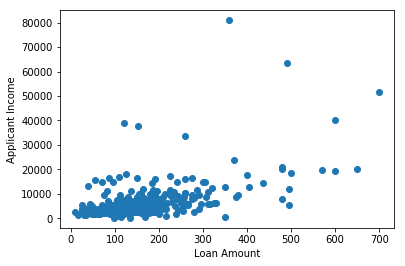

In [14]:
import matplotlib.pyplot
appIncome,loanAmount = df['ApplicantIncome'].tolist(), df['LoanAmount'].tolist()
matplotlib.pyplot.scatter(loanAmount,appIncome)
matplotlib.pyplot.xlabel('Loan Amount')
matplotlib.pyplot.ylabel('Applicant Income')
matplotlib.pyplot.show()

In [15]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


### Last two cells are depictions of the how the relationship can be determined. The graph is describing the kind of relationship where as correlation is describing the strength of relationship.

### ii. Continous & Categorical 
####     Boxplot is the best way to find this relationship

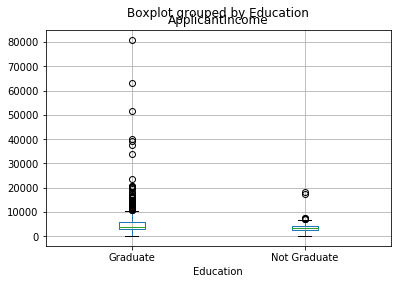

In [16]:
df.boxplot(column='ApplicantIncome',by='Education')

#### You can see that box plot in different category of Education where much of the Applicant Income is concentrated.

### iii. Categorical & Categorical
##### This relationship can be found through the stacked column chart, a two way table count and chisquare test.
##### Chisquare test is a difference between the expected and observed frequencies in one or more categories. 

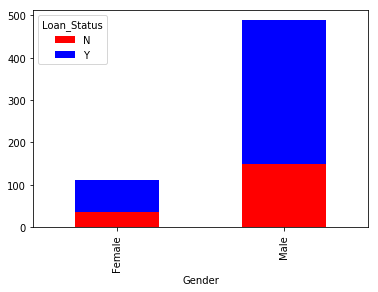

In [17]:
#A Stacked Column Chart
temp3 = pd.crosstab(df['Gender'],df['Loan_Status'])
temp3.plot(kind='bar',stacked=True,color=['red','blue'],grid=False)

#### Above graph shows that how Loan is provided to Male and Female.

In [22]:
# Chi Square Tests
import scipy.stats
scipy.stats.chisquare(df["Married"].value_counts())

Power_divergenceResult(statistic=56.01472995090016, pvalue=7.193008470280297e-14)

In [23]:
scipy.stats.chi2_contingency(temp3)

(0.13962612116543877,
 0.7086529816451106,
 1,
 array([[ 34.84858569,  77.15141431],
        [152.15141431, 336.84858569]]))

#### Above cells displayed the statistical test Chi Square.

In [25]:
# A Two - way table count.
temp = pd.crosstab(df['Gender'],df['Loan_Status'])
temp

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


#### Above shows the Two way table Count 
Next following cells are few more analysis on the data which will describe the mean, median and standard deviation

In [29]:
#A data based on the number of people who has the credit history
temp1 = df['Credit_History'].value_counts(ascending=True)
print(temp1)

0.0     89
1.0    475
Name: Credit_History, dtype: int64


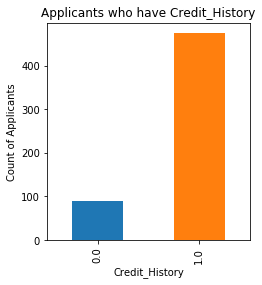

In [28]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants who have Credit_History")
temp1.plot(kind='bar')

In [30]:
df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


## 4. Treating the missing Values

In certain situations there are values that will not be available in the data. We need to handle these values otherwise may lead to the  wrong results. It can be any reason the value may not be available most probably the reasons may be due to in correct way extraction of data or collection of data. Handling these problems are necessary.

##### There are three ways to handle these missing values problems.
1. Dataset has lot of records then we have freedom to delete.
2. Variable is continous then fill the values with mean, median or mode.
3. Variable is categorical thwn replace with most appearing value in that variable.

In [33]:
# Now let us look at variables where the values are missed.
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
date                  0
dtype: int64

##### Above results show you how many values are missing in each variable. Let us take the Loan Amount which is the sensitive to the model. We will fill this variable wherever there is missing values with the mean value.

In [34]:
# Filling the missing values with the mean value of the loan amount.
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [35]:
#Now let us check if the values of the loan amount.
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
date                  0
dtype: int64

##### You can see before and after filling. There were 22 missing values after filling there are no missing values.

## 5. Outliers
 This is the value which is far away from overall pattern. There might be different reasons which causes outlierit might be data entry error, measurement error, intentional error or natural error. This leads vsriance error, lossing normality bias towards the subject of interest or might impact basic assumptions of statistical model assumptions.

In earlier graphs you might have seen outliers. These data points which are three or more standard deviation far away will be considered as outliers.

#### How to handle these Outliers
* Remove those data points
* Based on the business understanding replace outliers with mean or median.


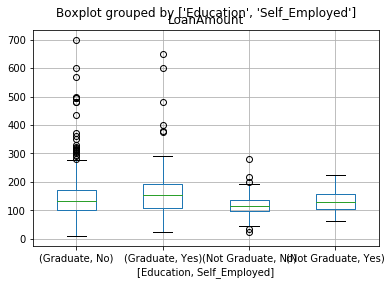

In [36]:
df.boxplot(column='LoanAmount',by=['Education','Self_Employed'])

#### In above box plot you can see that outliers are appeared in the Box Plot graph.

## 6. Feature Engineering
This is an art of extracting more information from existing data. Example data can be put into year, month and day. There are two things here
1. Variable Transformation
2. Variable Creation

#### 1. Variable Transformation
Transformation means replacement of a variable by a function. We transform the value to scale or standarddize the value of variable for better understanding.

In below example you will see the variable transformation.

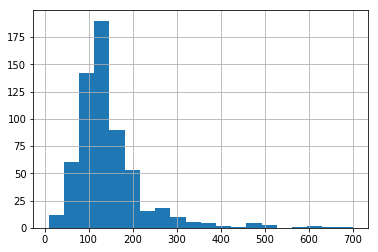

In [37]:
df['LoanAmount'].hist(bins=20)

#### You can see how the data is negatively skewed applying the log on this you will find the normal distribution of the data.

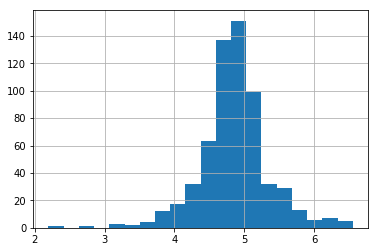

In [38]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

#### 2. Variable Creation 
This will help you to create useful variable. In our current working example we have Applicant Income and Co applicant income can be combined to provide Total Income.

In [39]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

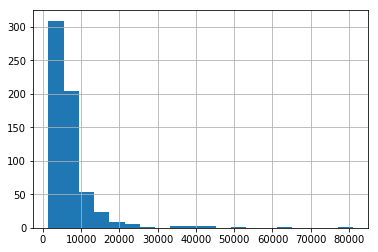

In [41]:
df['TotalIncome'].hist(bins=20)

Thanks for viewing this project if you have any recommendations of improving let me know.